In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from datetime import datetime

In [5]:
df = pd.read_csv('/root/forage-jp/forage-jpmc-qr/Task 1/Nat_Gas.csv', parse_dates=True, index_col='Dates')

/tmp/ipykernel_22294/941119313.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/root/forage-jp/forage-jpmc-qr/Task 1/Nat_Gas.csv', parse_dates=True, index_col='Dates')


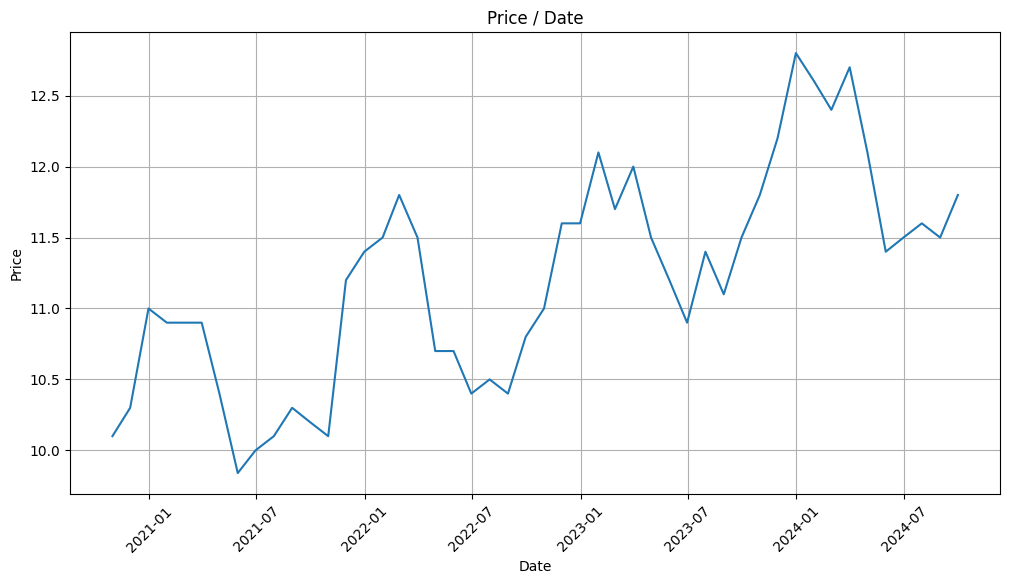

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Prices'])
plt.title('Price / Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
Ntest = 5
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [8]:
model = pm.auto_arima(train['Prices'], trace=True, suppress_warnings=True, seasonal=True, m=12, D=1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13.107, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9.939, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=62.089, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=14.854, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=5.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=3.717, Time=5.31 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=7.25 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=2.066, Time=6.31 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=4.28 sec
 ARIMA(0,0,0

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   43
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                   3.967
Date:                    Sat, 02 Mar 2024   AIC                              2.066
Time:                            14:03:15   BIC                              9.236
Sample:                        10-31-2020   HQIC                             4.403
                             - 04-30-2024                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5054      0.192      7.851      0.000       1.130       1.881
ar.S.L12      -0.7612      0.140     -5.437      0.000      -1.036      -0.487
ar.S.L24      -0.8488      0.197     -4.311      0.000      -1.235      -0.463
ma.S.L12      -0.8843      0.005   -181.740      0.000      -0.894      -0.875
sigma2         0.0070      0.007      0.954      0.340      -0.007       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.37   Prob(JB):                         0.56
Heteroskedasticity (H):               0.81   Skew:                            -0.39
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+19. Standard errors may be unstable.
"""

In [10]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (2, 1, 1, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [11]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred, label='fitted')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend()

  print(confint)

[[11.37652476 11.80217639]
 [11.48863992 11.91429155]
 [11.64286686 12.06851848]
 [11.78452414 12.21017577]
 [11.73657288 12.16222451]]


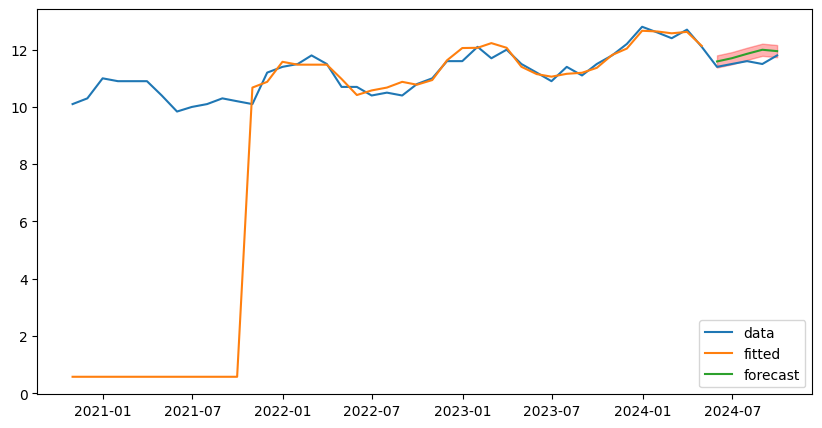

In [12]:
plot_result(model, df, train, test)

In [13]:
model2 = pm.ARIMA(order=(0, 0, 0), seasonal_order=(2, 1, 1, 12))

In [14]:
model2 = model2.fit(df['Prices'])
model2.summary()

/root/forage-jp/forage-jpmc-swe-task-1/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/root/forage-jp/forage-jpmc-swe-task-1/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/root/forage-jp/forage-jpmc-swe-task-1/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   48
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                   3.448
Date:                    Sat, 02 Mar 2024   AIC                              3.103
Time:                            14:03:18   BIC                             11.021
Sample:                        10-31-2020   HQIC                             5.866
                             - 09-30-2024                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1947      0.223      5.366      0.000       0.758       1.631
ar.S.L12      -0.6513      0.267     -2.437      0.015      -1.175      -0.127
ar.S.L24      -0.5562      0.195     -2.848      0.004      -0.939      -0.173
ma.S.L12      -0.7904      0.061    -13.062      0.000      -0.909      -0.672
sigma2         0.0192      0.011      1.827      0.068      -0.001       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.86   Prob(JB):                         0.39
Heteroskedasticity (H):               1.03   Skew:                            -0.37
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.07e+17. Standard errors may be unstable.
"""

In [15]:
future_dates_idx = pd.date_range(start='2024-09-30', end='2025-10-31')
# Predicting a year from final point, thus 12 months in the future.
year_pred, confint = model2.predict(n_periods=12, return_conf_int=True)
year_pred

2024-10-31    11.855166
2024-11-30    12.679150
2024-12-31    12.966229
2025-01-31    13.104222
2025-02-28    13.298130
2025-03-31    13.069395
2025-04-30    12.386379
2025-05-31    12.272865
2025-06-30    12.070712
2025-07-31    12.224192
2025-08-31    12.217241
2025-09-30    12.439050
Freq: M, dtype: float64

In [16]:
prediction = pd.DataFrame(year_pred, columns=['Prediction'])
df2 = df.copy()
df2 = pd.concat([df, prediction])
df2['Prediction']['2024-09-30'] = df2['Prices']['2024-09-30']

The 'price_estimate' function must take a date in the format YYYY-MM-DD.
Predicted mean price for 2025-09-30 is 12.44
Predicted price for 2025-09-30 with 95% confidence is between 12.14 and 12.73


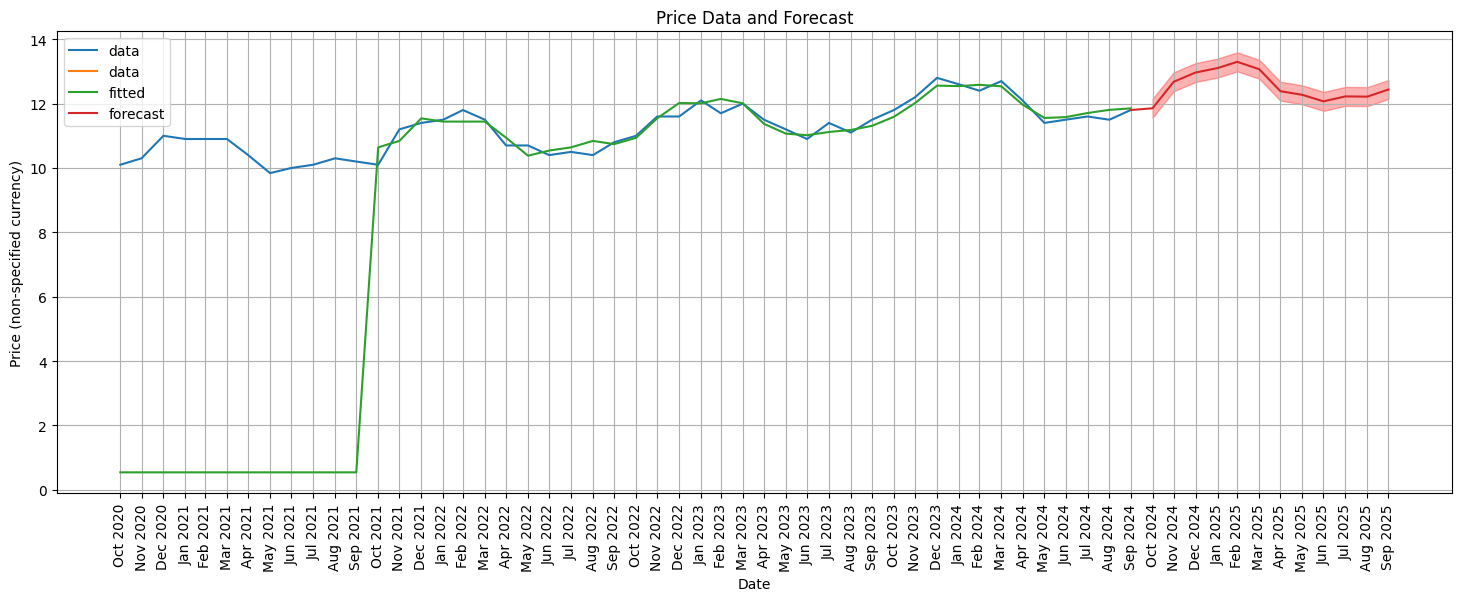

In [17]:
fig, ax = plt.subplots(figsize=(18, 6))

monthly_ticks = pd.date_range(start=df2.index[0], end=df2.index[-1], freq='M')

params = model2.get_params()
d = params['order'][1]

train_pred = model2.predict_in_sample(start=d, end=-1)
test_pred, confint = model2.predict(n_periods=12, return_conf_int=True)

ax.plot(df2.index[:-12], df2[:-12], label='data')
ax.plot(train_pred.index, train_pred, label='fitted')
ax.plot(df2['Prediction'].index, df2['Prediction'], label='forecast')
ax.fill_between(prediction.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
ax.grid(which='both')
plt.title('Price Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (non-specified currency)')
plt.xticks(monthly_ticks, monthly_ticks.strftime('%b %Y'), rotation=90)

ax.legend()

print("The 'price_estimate' function must take a date in the format YYYY-MM-DD.")

def price_estimate(date):
  try:
    future_dates = [str(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').date()) for x in prediction.index.to_list()]
  except:
    print("Invalid input.")

  try:
    print(f"Predicted mean price for {date} is {prediction['Prediction'][date]:.2f}")
    print(f"Predicted price for {date} with 95% confidence is between {confint[future_dates.index(date)][0]:.2f} and {confint[future_dates.index(date)][1]:.2f}")
  except:
    print("Date is out of range.")
  

price_estimate('2025-09-30')